In [1]:
#DATA CLEANING and MERGING

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets

In [3]:
# Load the dataset
movies_metadata = pd.read_csv('./data/movies_metadata.csv')

# Convert budget, popularity, revenue, runtime, vote_average, and vote_count to numeric
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
for col in numeric_columns:
    movies_metadata[col] = pd.to_numeric(movies_metadata[col], errors='coerce').fillna(0)

# Convert release_date to datetime
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')

# Drop unneeded columns
columns_to_drop = ['adult', 'homepage', 'poster_path', 'video']
movies_metadata.drop(columns=columns_to_drop, inplace=True)

/var/folders/zt/27hgxryj0m12xbzmnd5qbn080000gn/T/ipykernel_10790/2315768313.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('./data/movies_metadata.csv')


In [4]:
# load credits.csv into a DataFrame
credits = pd.read_csv('./data/credits.csv')

# Convert 'id' in credits to integer
credits['id'] = pd.to_numeric(credits['id'], errors='coerce').astype('Int64')

In [5]:
# load keywords.csv into a DataFrame
keywords = pd.read_csv('./data/keywords.csv')

# Convert 'id' in keywords to integer
keywords['id'] = pd.to_numeric(keywords['id'], errors='coerce').fillna(0).astype('Int64')

In [6]:
# Convert 'id' in movies_metadata to integer
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce').fillna(0).astype('Int64')

In [7]:
# Merge
movies_metadata = movies_metadata.merge(credits, on='id', how='left')
movies_metadata = movies_metadata.merge(keywords, on='id', how='left')

In [8]:
# Load the CSV file into a DataFrame
tmdb = pd.read_csv('./data/tmdb_5000_movies.csv')

# Display the first few rows of the DataFrame to verify it's loaded correctly
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [13]:

# Load the CSV file into a DataFrame
df = pd.read_csv('data/tmdb_5000_movies.csv')

# Define a function to clean up the "genres" column
def clean_genres(genres_str):
    genres_list = genres_str.strip('[]').replace('"', '').split(', ')
    return [genre.strip() for genre in genres_list]

# Apply the clean_genres function to the "genres" column
df['genres'] = df['genres'].apply(clean_genres)

# Convert 'release_date' to datetime data type
df['release_date'] = pd.to_datetime(df['release_date'])

# Group by release date and genre, and calculate aggregate revenue
genre_revenue_over_time = df.explode('genres').groupby(['release_date', 'genres'])['revenue'].sum().reset_index()

# Sort DataFrame by release date
genre_revenue_over_time = genre_revenue_over_time.sort_values(by='release_date')

# Create line chart using Plotly
fig = px.line(
    genre_revenue_over_time,
    x='release_date',
    y='revenue',
    color='genres',
    title='Aggregate Genre Revenue Over Time',
    labels={'release_date': 'Release Date', 'revenue': 'Aggregate Revenue', 'genres': 'Genre'},
)

fig.show()

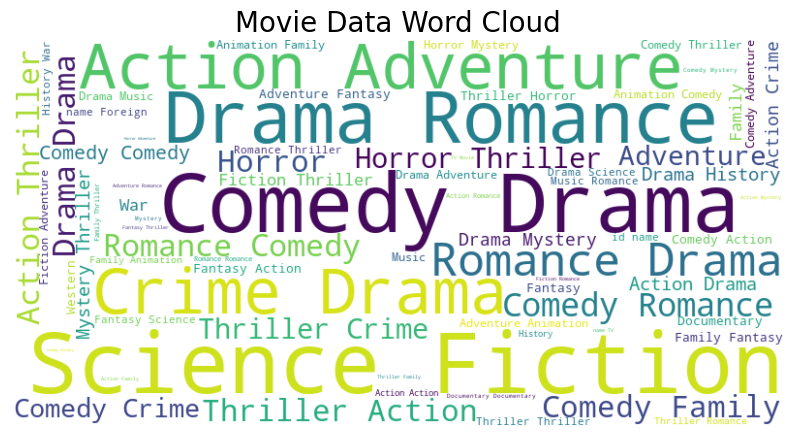

In [30]:


# Selecting columns containing text data
text_columns = ['genres']

# Concatenate text data from selected columns
text_data = tmdb[text_columns].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Combine all text into a single string
text_combined = ' '.join(text_data)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Movie Data Word Cloud', fontsize=20)
plt.axis('off')
plt.show()


In [27]:
# Save the merged DataFrame to a new CSV file
movies_metadata.to_csv('./data/cleaned_merged_movies_data.csv', index=False)

In [16]:
import pandas as pd
import plotly.express as px

# Load the CSV file into a DataFrame
df = pd.read_csv('data/tmdb_5000_movies.csv')

# Define a function to clean up the "genres" column
def clean_genres(genres_str):
    genres_list = genres_str.strip('[]').replace('"', '').split(', ')
    return [genre.strip() for genre in genres_list]

# Apply the clean_genres function to the "genres" column
df['genres'] = df['genres'].apply(clean_genres)

# Convert 'release_date' to datetime data type
df['release_date'] = pd.to_datetime(df['release_date'])

# Calculate profitability for each genre over time
profitability_by_genre_over_time = df.explode('genres').groupby(['release_date', 'genres'])[['revenue', 'budget']].sum().reset_index()
profitability_by_genre_over_time['profit'] = profitability_by_genre_over_time['revenue'] - profitability_by_genre_over_time['budget']

# Find the least profitable genre for each time period
least_profitable_genre_over_time = profitability_by_genre_over_time.loc[profitability_by_genre_over_time.groupby('release_date')['profit'].idxmin()]

# Sort DataFrame by release date
least_profitable_genre_over_time = least_profitable_genre_over_time.sort_values(by='release_date')

# Create line chart using Plotly
fig = px.line(
    least_profitable_genre_over_time,
    x='release_date',
    y='profit',
    color='genres',
    title='Least Profitable Genre Over Time',
    labels={'release_date': 'Release Date', 'profit': 'Profit', 'genres': 'Genre'},
)

fig.show()


In [14]:
# Assuming the CSV file is located in the './data/' directory
file_path = './data/cleaned_merged_movies_data.csv'

# Read the CSV file into a DataFrame
cleaned_merged_movies_data = pd.read_csv(file_path)



# Display the DataFrame
cleaned_merged_movies_data


,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,keywords
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46627,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],...,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,4.0,1.0,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...","[{'id': 10703, 'name': 'tragic love'}]"
46628,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",...,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,9.0,3.0,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...","[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46629,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",...,90.0,"[{'iso_639_1': 'en', 'name'

In [37]:
# Selecting relevant columns
columns = ['genres', 'runtime', 'popularity']

# Creating a dropdown menu for movie selection
dropdown_options = [{'label': movie, 'value': movie} for movie in cleaned_merged_movies_data['original_title']]

# Define the layout of the radar chart
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 10]  # Adjust the range as needed
        )),
    showlegend=True
)

# Function to generate radar chart based on selected movie
def generate_radar_chart(selected_movie):
    movie_data = cleaned_merged_movies_data[cleaned_merged_movies_data['original_title'] == selected_movie]
    fig = go.Figure(data=go.Scatterpolar(
        r=movie_data[columns].values.flatten().tolist(),
        theta=columns*2,  # Repeating columns to close the radar chart
        fill='toself',
        name=selected_movie
    ), layout=layout)
    fig.show()

# Creating the dropdown menu
dropdown = go.FigureWidget([
    go.Dropdown(
        id='movie-dropdown',
        options=dropdown_options,
        value=cleaned_merged_movies_data['original_title'].iloc[0],  # Default value
        description='Movie:',
        disabled=False
    )
])

# Display the radar chart based on the selected movie
def response(change):
    generate_radar_chart(change.new)

dropdown.data[0].on_change(response, 'value')
dropdown


AttributeError: module 'plotly.graph_objects' has no attribute 'Dropdown'

/Users/macbook_air/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


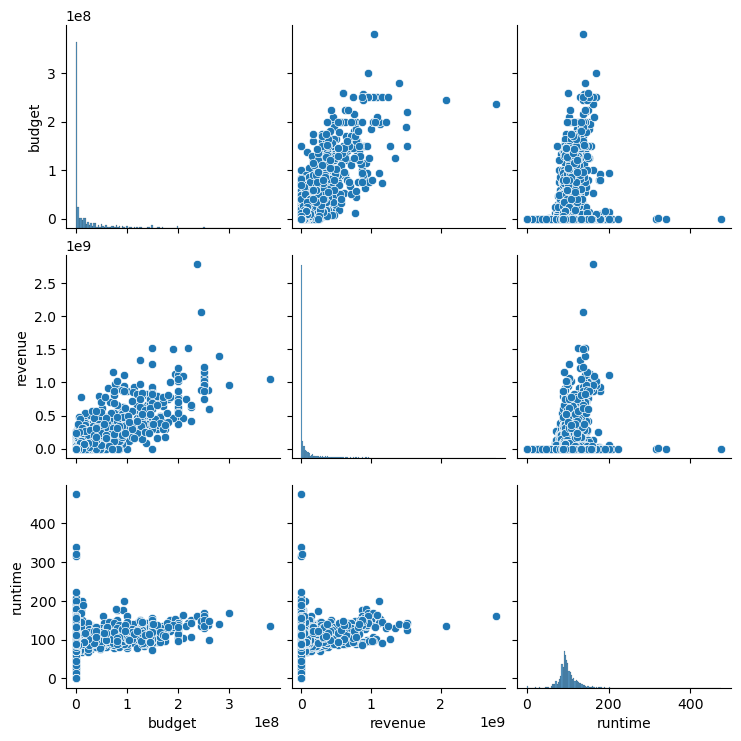

In [24]:
# Handle missing values
cleaned_merged_movies_data.dropna(inplace=True)

# Selecting relevant quantitative variables
quantitative_variables = ['budget', 'revenue','runtime']

# Subsetting the DataFrame with only the quantitative variables
movies_subset = cleaned_merged_movies_data[quantitative_variables]

# Creating pairplot
sns.pairplot(movies_subset)
plt.show()


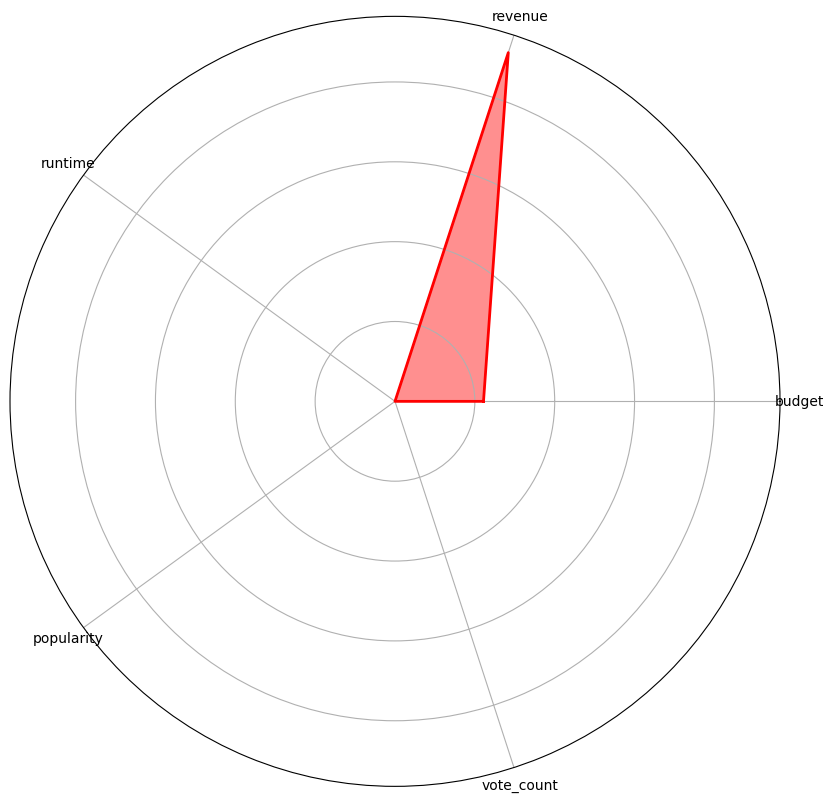

In [27]:
# Selecting relevant quantitative variables
quantitative_variables = ['budget', 'revenue', 'runtime', 'popularity', 'vote_count']

# Subsetting the DataFrame with only the quantitative variables
movies_subset = cleaned_merged_movies_data[quantitative_variables]

# Calculate mean values for each variable
mean_values = movies_subset.mean()

# Number of variables
num_vars = len(quantitative_variables)

# Create a DataFrame to store mean values
stats = pd.DataFrame({
    'mean': mean_values
})

# Create a list of variable names
labels = quantitative_variables

# Number of variables
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start value to the end.
stats = np.concatenate((stats['mean'].values,[stats['mean'].values[0]]))
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red', linewidth=2)

# Fill area with color
ax.fill(angles, stats, color='red', alpha=0.25)

# Labels for each point
ax.set_yticklabels([])

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], labels)

# Show the plot
plt.show()


In [9]:
# MORE CLEANING AND PARSING JSON-LIKE STRING COLUMNS IN A DATAFRAME

In [10]:
import ast  # Import the Abstract Syntax Trees module

# Create DataFrame
df = pd.read_csv('./data/cleaned_merged_movies_data.csv')

# Parse the JSON-like strings in columns
def parse_column(text):
    try:
        # Convert the string to Python objects
        return ast.literal_eval(text)
    except ValueError:
        return []  # Return an empty list if there's any error
    except SyntaxError:
        return []  # Handle syntax error by returning an empty list

# Apply this function to the 'genres' column to convert from string to list
df['genres'] = df['genres'].apply(parse_column)

# Now, to extract just the names from the 'genres' column
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Preview the changes to the 'genres' column to confirm it's been cleaned
df['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [11]:
# Apply the parsing function to the 'production_companies' column
df['production_companies'] = df['production_companies'].apply(parse_column)

# Extract company names
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [12]:
# Apply the parsing function to the 'cast' column
df['cast'] = df['cast'].apply(parse_column)

# Extract names of the first few cast members, 5 for simplicity
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x[:5]] if isinstance(x, list) else [])

In [13]:
# Apply the parsing function to the 'crew' column
df['crew'] = df['crew'].apply(parse_column)

# Extract names of directors
df['crew'] = df['crew'].apply(lambda x: [i['name'] for i in x if i['job'] == 'Director'] if isinstance(x, list) else [])

In [14]:
# Apply the parsing function to the 'keywords' column
df['keywords'] = df['keywords'].apply(parse_column)

# Extract keywords
df['keywords'] = df['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [15]:
# WORKFLOW FOR BUILDING A CONTENT-BASED RECOMMENDATION SYSTEM

In [16]:
#Aggregate Text Features, Combine text features into one string
df['combined_features'] = df['overview'] + " " + df['genres'].apply(" ".join) + " " + df['keywords'].apply(" ".join) + " " + df['cast'].apply(" ".join) + " " + df['crew'].apply(" ".join)

In [17]:
# Fill NaN values in 'combined_features' with an empty string
df['combined_features'] = df['combined_features'].fillna('')

#TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the combined features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

In [ ]:
# This one will take FOREVER, but that's ok...
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import linear_kernel

# Further reduce the number of components
svd = TruncatedSVD(n_components=50)  # Adjusting n_components further
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Compute similarity on the reduced matrix
cosine_sim = linear_kernel(tfidf_matrix_reduced, tfidf_matrix_reduced)

In [ ]:
#Recommendation Function
# Function to get movie recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df.loc[df['title'] == title].index[0]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
test_movie_title = "Toy Story"
recommended_movies = get_recommendations(test_movie_title)
print(f"Recommendations for {test_movie_title}:")
recommended_movies

In [ ]:
# PROGRAMMATICALLY SELECT A DIVERSE SET OF TEST MOVIES, 
#ENSURE THEY EXIST IN THE DATASET, 
#AND GENERATE RECOMMENDATIONS FOR EACH OF THEM.
#EASY-PEASY #HATERSgonnaHATE #PLAYERSgonnaPLATE

In [ ]:
# Example to programmatically select a diverse set of test movies
test_movies = [
    "Toy Story",  # Animation/Comedy
    "Pulp Fiction",  # Crime/Drama
    "The Shining",  # Horror
    "Interstellar",  # Sci-Fi
    "The Grand Budapest Hotel",  # Comedy/Drama
    "Hereditary",  # Horror/Thriller
    "Moonlight",  # Drama
    "Mad Max: Fury Road",  # Action
    # Add more titles as needed to cover a wide range of genres and years
]

# Ensure all test movies are in the dataset
test_movies = [movie for movie in test_movies if movie in df['title'].values]

In [ ]:
for movie in test_movies:
    print(f"Recommendations for {movie}:")
    recommendations = get_recommendations(movie)
    print(recommendations)
    print("\n" + "-"*60 + "\n")

In [ ]:
#FIN